**Here i am going to go throu all te EDA techniques i learned  and try to apply them and there is a cool staff for pandas  whichh i have gained from the Pandas cook book is to use the pandas profiling tool and then life is easy**

Project 4: DAvid, Harsha and My self(kiros) Group Project

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas_profiling
np.random.seed(42)

from matplotlib import rcParams
rcParams.update({'figure.autolayout':True})

# setting visual

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
 

In [2]:
prediction_data=pd.read_csv('./assets/test.csv',index_col='Id')

In [3]:
working_data=pd.read_csv('./assets/train.csv')

In [4]:
NOAA=pd.read_csv('./assets/weather.csv')

In [5]:
spray=pd.read_csv('./assets/spray.csv')

In [6]:
train, test=train_test_split(working_data, test_size=.20, random_state=523)

In [7]:
prediction_data.shape, working_data.shape, spray.shape, NOAA.shape

((116293, 10), (10506, 12), (14835, 4), (2944, 22))

In [8]:
pandas_profiling.ProfileReport(prediction_data)

In [9]:
working_data.describe()

Block      Latitude     Longitude  AddressAccuracy  \
count  10506.000000  10506.000000  10506.000000     10506.000000   
mean      35.687797     41.841139    -87.699908         7.819532   
std       24.339468      0.112742      0.096514         1.452921   
min       10.000000     41.644612    -87.930995         3.000000   
25%       12.000000     41.732984    -87.760070         8.000000   
50%       33.000000     41.846283    -87.694991         8.000000   
75%       52.000000     41.954690    -87.627796         9.000000   
max       98.000000     42.017430    -87.531635         9.000000   

       NumMosquitos    WnvPresent  
count  10506.000000  10506.000000  
mean      12.853512      0.052446  
std       16.133816      0.222936  
min        1.000000      0.000000  
25%        2.000000      0.000000  
50%        5.000000      0.000000  
75%       17.000000      0.000000  
max       50.000000      1.000000

In [10]:
working_data[['Latitude','Longitude','WnvPresent']].to_csv('LLW.csv')

In [11]:
for item in working_data:
    print (item)
    print (working_data[item].nunique())

Date
95
Address
138
Species
7
Block
64
Street
128
Trap
136
AddressNumberAndStreet
138
Latitude
138
Longitude
138
AddressAccuracy
4
NumMosquitos
50
WnvPresent
2


In [12]:
working_data['Trap'].value_counts().plot(kind='barh', figsize=(40,60), fontsize=20)

In [13]:
NOAA.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

     ...    CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0    ...                0      M      0.0        0.00       29.10    29.82   
1    ...                M      M        M        0.00       29.18    29.82   
2    ...         BR     0      M      0.0        0.00       29.38    30.09   
3    ...      BR HZ     M      M        M        0.00       29.44    30.08   
4    ...                0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

In [14]:
NOAA.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [15]:
#We're going to need to convert the object Data series into floats, 
#integers in the weather dataset
NOAA.dtypes 

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [16]:
# Convert the dates to datetime format
NOAA['Date'] = pd.to_datetime(NOAA['Date'])
working_data['Date'] = pd.to_datetime(working_data['Date'])
prediction_data['Date'] = pd.to_datetime(prediction_data['Date'])
spray['Date'] = pd.to_datetime(spray['Date'])

In [17]:
# converting to the time so that it will help to see the trap time and spary time as well as weather forcast
working_data.Date = pd.to_datetime(working_data.Date)
prediction_data.Date = pd.to_datetime(prediction_data.Date)
NOAA.Date = pd.to_datetime(NOAA.Date)
spray.Time =pd.to_datetime(spray.Time)
spray.Date = pd.to_datetime(spray.Date)

The working_data(training data) and Prediction_data(Test data) we need to convert it to hr,day,week, month and year so that we can compare days as well as weeks after we go along merging the data

In [18]:
# Creating comparison play ground
# my prediction data set here my testing data
prediction_data['Hour'] = prediction_data.Date.dt.hour
prediction_data['Month'] = prediction_data.Date.dt.month
prediction_data['Year'] = prediction_data.Date.dt.year
prediction_data['Day'] = prediction_data.Date.dt.day
prediction_data['Week'] = prediction_data.Date.dt.week
# my training in this notebook my working data
working_data['Hour'] = working_data.Date.dt.hour
working_data['Week'] = working_data.Date.dt.week
working_data['Month'] = working_data.Date.dt.month
working_data['Year'] = working_data.Date.dt.year
working_data['Day'] = working_data.Date.dt.day
working_data['Week'] = working_data.Date.dt.week

In [19]:
# Get rid of all station 2 input
# utilizing station 1  as point of reference
#both stations would double the data
NOAA = NOAA[NOAA['Station'] == 1]

In [20]:
#changing the values 'M' values to the straight average in 'Tavg'
new_vals = []

for i, x in enumerate(NOAA['Tavg']):
    if x == 'M':
        avg = (NOAA['Tmax'].loc[i] + NOAA['Tmin'].loc[i]) / 2
        new_vals.append(avg)
    else:
        new_vals.append(x)
        
NOAA['Tavg'] = new_vals
NOAA['Tavg'] = NOAA['Tavg'].astype(int)  # developed for the team  project  and was incorporated 

In [21]:

NOAA['Tmin'] = NOAA['Tmin'].astype(float)
NOAA['Tmax'] = NOAA['Tmax'].astype(float)
NOAA['DewPoint'] = NOAA['DewPoint'].astype(float)

In [22]:
#Used this function with others to check for the unique values and see which ones we 
#need to replace.
NOAA.PrecipTotal.unique() 

array(['0.00', '  T', '0.13', '0.38', '0.14', '0.07', '0.02', '1.01',
       '0.04', '0.01', '0.19', '0.39', '0.42', '0.28', '0.58', '0.05',
       '0.16', '0.15', '0.40', '0.30', '0.43', '0.11', '1.55', '0.17',
       '0.03', '1.43', '0.26', '1.31', '0.06', '0.29', '0.41', '0.23',
       '0.09', '1.33', '0.91', '0.37', '2.35', '0.24', '0.34', '0.18',
       '0.36', '0.27', '0.33', '1.28', '0.76', '0.95', '0.08', '0.12',
       '0.48', '0.52', '0.64', '1.24', '0.20', '0.72', '0.73', '1.61',
       '0.74', '1.05', '2.43', '2.90', '1.23', '6.64', '1.44', '0.82',
       '0.80', '0.32', '0.67', '0.55', '1.73', '0.44', '0.45', '3.97',
       '0.25', '0.68', '0.63', '0.35', '0.93', '0.22', '0.75', '0.89',
       '0.21', '0.46', '1.03', '0.60', '0.81', '0.97', '1.49', '1.02',
       '0.59', '0.87', '0.85', '0.54', '0.79', '2.79', '3.64', '0.10',
       '0.31', '2.24', '1.06', '1.88', '6.86', '0.71', '0.70', '1.11',
       '0.65', '1.21', '0.77', '1.34', '0.47', '1.12', '0.57', '0.51',
       

I will convert the Date to a date-time series and also convert M  values in the WetBulb data series into a null value since M values are designated as 'missing'. Then we want to convert it into an integer data type. 

In [23]:
#filling missing values and changing dtypes
NOAA['WetBulb'] = NOAA['WetBulb'].apply(lambda x: np.nan if x == 'M' else x)
NOAA['WetBulb'] = NOAA['WetBulb'].astype(float)
#Forward filling missing values in cool/heat/stnPressure/Avgspeed
NOAA['Heat'] = NOAA['Heat'].apply(lambda x: np.nan if x == 'M' else x)
NOAA['Heat'] = NOAA['Heat'].astype(float)
NOAA['Cool'] = NOAA['Cool'].apply(lambda x: np.nan if x == 'M' else x)
NOAA['Cool'] = NOAA['Cool'].astype(float)
NOAA['StnPressure'] = NOAA['StnPressure'].apply(lambda x: np.nan if x == 'M' else x)
NOAA['StnPressure'] = NOAA['StnPressure'].astype(float)
NOAA['SeaLevel'] = NOAA['SeaLevel'].apply(lambda x: np.nan if x == 'M' else x)
NOAA['SeaLevel'] = NOAA['SeaLevel'].astype(float)
NOAA['AvgSpeed'] = NOAA['AvgSpeed'].apply(lambda x: np.nan if x == 'M' else x)
NOAA['AvgSpeed'] = NOAA['AvgSpeed'].astype(float)
NOAA['Depth'] = NOAA['Depth'].apply(lambda x: np.nan if x == 'M' else x)
NOAA['Depth'] = NOAA['Depth'].astype(float)
NOAA['Depart'] = NOAA['Depart'].apply(lambda x: np.nan if x == 'M' else x)
NOAA['Depart'] = NOAA['Depart'].astype(float)
#dropping columns
NOAA = NOAA.drop('Water1', axis=1)
# NOAA =NOAA.drop(['Sunrise', 'Sunset', 'CodeSum', 'Depth'], axis = 1)
# NOAA = NOAA.drop('Depart', axis=1)

In [24]:
NOAA.PrecipTotal.unique() #  checking unique values of PrecipTotal that need replacement

array(['0.00', '  T', '0.13', '0.38', '0.14', '0.07', '0.02', '1.01',
       '0.04', '0.01', '0.19', '0.39', '0.42', '0.28', '0.58', '0.05',
       '0.16', '0.15', '0.40', '0.30', '0.43', '0.11', '1.55', '0.17',
       '0.03', '1.43', '0.26', '1.31', '0.06', '0.29', '0.41', '0.23',
       '0.09', '1.33', '0.91', '0.37', '2.35', '0.24', '0.34', '0.18',
       '0.36', '0.27', '0.33', '1.28', '0.76', '0.95', '0.08', '0.12',
       '0.48', '0.52', '0.64', '1.24', '0.20', '0.72', '0.73', '1.61',
       '0.74', '1.05', '2.43', '2.90', '1.23', '6.64', '1.44', '0.82',
       '0.80', '0.32', '0.67', '0.55', '1.73', '0.44', '0.45', '3.97',
       '0.25', '0.68', '0.63', '0.35', '0.93', '0.22', '0.75', '0.89',
       '0.21', '0.46', '1.03', '0.60', '0.81', '0.97', '1.49', '1.02',
       '0.59', '0.87', '0.85', '0.54', '0.79', '2.79', '3.64', '0.10',
       '0.31', '2.24', '1.06', '1.88', '6.86', '0.71', '0.70', '1.11',
       '0.65', '1.21', '0.77', '1.34', '0.47', '1.12', '0.57', '0.51',
       

In [25]:
#Changing the 'T' for trace rain to a quantity of 0.001, forward filling 'M' values
NOAA['PrecipTotal'] = NOAA['PrecipTotal'].str.strip()      # some values  white spalce
NOAA['PrecipTotal'] = NOAA['PrecipTotal'].str.replace(',', '') #again need to remove white space
NOAA['PrecipTotal'] = NOAA['PrecipTotal'].apply(lambda x: 0.1 if x == 'T' else x)
NOAA['PrecipTotal'] = NOAA['PrecipTotal'].apply(lambda x: np.nan if x == 'M' else x)
NOAA['PrecipTotal'] = NOAA['PrecipTotal'].astype(float)

In [26]:
NOAA['Tavg'] = NOAA['Tavg'].apply(lambda x: np.nan if x == 'M' else x)
NOAA['Tavg'] = NOAA['Tavg'].astype(float)

In [27]:
#not much values, so we'll want to convert the T (Trace) values to probably 0.1 to indicate a 
#trace value. Since we only have measurements of 0.0 and 0.1, it makes sense to 
#convert the trace values to 0.1
NOAA.SnowFall.unique() 

array(['0.0', '  T', '0.1'], dtype=object)

In [28]:
#You want to do the same with with SnowFall. But it has an extra value, T, which means trace so we want to replace it
#with 0.1 as it doesn't mean no accumulation, so we will designate it as 0.1 instead of 0. Also we used the str.replace
#function to remove the trailing white space.
NOAA['SnowFall'] = NOAA['SnowFall'].str.strip()
NOAA['SnowFall'] = NOAA['SnowFall'].str.replace(',', '')
NOAA['SnowFall'] = NOAA['SnowFall'].apply(lambda x: np.nan if x == 'M' else x)
NOAA['SnowFall'] = NOAA['SnowFall'].apply(lambda x: 0.1 if x == 'T' else x)
NOAA['SnowFall'] = NOAA['SnowFall'].astype(float)

In [29]:
NOAA.ResultDir = NOAA.ResultDir.astype(int)

In [30]:
#checking to see if any more conversions are necessary here again after the munging
NOAA.dtypes 

Station                 int64
Date           datetime64[ns]
Tmax                  float64
Tmin                  float64
Tavg                  float64
Depart                float64
DewPoint              float64
WetBulb               float64
Heat                  float64
Cool                  float64
Sunrise                object
Sunset                 object
CodeSum                object
Depth                 float64
SnowFall              float64
PrecipTotal           float64
StnPressure           float64
SeaLevel              float64
ResultSpeed           float64
ResultDir               int64
AvgSpeed              float64
dtype: object

In [31]:
NOAA.isnull().sum().any()

True

###### Trap EDA

In [32]:
# Do traps stay in the same place at all times?
location_features = ['Address', 'Block', 'Street', 'AddressNumberAndStreet',
                     'Latitude', 'Longitude', 'AddressAccuracy']

working_data_by_trap = working_data.groupby('Trap')[location_features].nunique()

non_unique_index = [index for index, row in working_data_by_trap.iterrows()
                    if row.sum() != working_data_by_trap.shape[1]]

working_data_by_trap.loc[non_unique_index, :]

Address  Block  Street  AddressNumberAndStreet  Latitude  Longitude  \
Trap                                                                        
T009        2      1       2                       2         2          2   
T035        2      2       2                       2         2          2   

      AddressAccuracy  
Trap                   
T009                1  
T035                1

In [33]:
def show_trap_loc(trap):
    print('Trap: {!r}'.format(trap))
    for feat in location_features:        
        print('Unique values for {!r}:\n{}\n'.format(feat, working_data[working_data.Trap==trap][feat].unique()))
    print()
        
for trap in ['T009', 'T035']:
    show_trap_loc(trap)

Trap: 'T009'
Unique values for 'Address':
['9100 West Higgins Avenue, Chicago, IL 60656, USA'
 '9100 West Higgins Road, Rosemont, IL 60018, USA']

Unique values for 'Block':
[91]

Unique values for 'Street':
[' W HIGGINS AVE' ' W HIGGINS RD']

Unique values for 'AddressNumberAndStreet':
['9100  W HIGGINS AVE, Chicago, IL' '9100  W HIGGINS RD, Chicago, IL']

Unique values for 'Latitude':
[41.981964 41.992478]

Unique values for 'Longitude':
[-87.812827 -87.862995]

Unique values for 'AddressAccuracy':
[8]


Trap: 'T035'
Unique values for 'Address':
['3000 South Hoyne Avenue, Chicago, IL 60608, USA'
 '5100 West 72nd Street, Chicago, IL 60638, USA']

Unique values for 'Block':
[30 51]

Unique values for 'Street':
[' S HOYNE AVE' ' W 72ND ST']

Unique values for 'AddressNumberAndStreet':
['3000  S HOYNE AVE, Chicago, IL' '5100  W 72ND ST, Chicago, IL']

Unique values for 'Latitude':
[41.836644 41.763733]

Unique values for 'Longitude':
[-87.677737 -87.742302]

Unique values for 'AddressAcc

In [34]:
# Sanity check: Do traps stay in the same place on the same day?
working_data_by_trap = working_data.groupby(['Date', 'Trap'])[location_features].nunique()

len([index for index, row in working_data_by_trap.iterrows() 
     if row.sum() != working_data_by_trap.shape[1]])

0

In [35]:
working_data[working_data.Trap=='T009']

Date                                           Address  \
50    2007-06-05  9100 West Higgins Avenue, Chicago, IL 60656, USA   
221   2007-07-02  9100 West Higgins Avenue, Chicago, IL 60656, USA   
312   2007-07-11  9100 West Higgins Avenue, Chicago, IL 60656, USA   
313   2007-07-11  9100 West Higgins Avenue, Chicago, IL 60656, USA   
714   2007-07-27  9100 West Higgins Avenue, Chicago, IL 60656, USA   
715   2007-07-27  9100 West Higgins Avenue, Chicago, IL 60656, USA   
716   2007-07-27  9100 West Higgins Avenue, Chicago, IL 60656, USA   
862   2007-08-01  9100 West Higgins Avenue, Chicago, IL 60656, USA   
863   2007-08-01  9100 West Higgins Avenue, Chicago, IL 60656, USA   
864   2007-08-01  9100 West Higgins Avenue, Chicago, IL 60656, USA   
865   2007-08-01  9100 West Higgins Avenue, Chicago, IL 60656, USA   
866   2007-08-01  9100 West Higgins Avenue, Chicago, IL 60656, USA   
1512  2007-08-07  9100 West Higgins Avenue, Chicago, IL 60656, USA   
1513  2007-08-07  9100 West Higgins Avenue, Chicago, IL 60656, USA   
1514  2007-08-07  9100 West Higgins Avenue, Chicago, IL 60656, USA   
1831  2007-08-15  9100 West Higgins Avenue, Chicago, IL 60656, USA   
1832  2007-08-15  9100 West Higgins Avenue, Chicago, IL 60656, USA   
2224  2007-08-21  9100 West Higgins Avenue, Chicago, IL 60656, USA   
2225  2007-08-21  9100 West Higgins Avenue, Chicago, IL 60656, USA   
2555  2007-08-24  9100 West Higgins Avenue, Chicago, IL 60656, USA   
2556  2007-08-24  9100 West Higgins Avenue, Chicago, IL 60656, USA   
2557  2007-08-24  9100 West Higgins Avenue, Chicago, IL 60656, USA   
2844  2007-09-04  9100 West Higgins Avenue, Chicago, IL 60656, USA   
2845  2007-09-04  9100 West Higgins Avenue, Chicago, IL 60656, USA   
2846  2007-09-04  9100 West Higgins Avenue, Chicago, IL 60656, USA   
2847  2007-09-04  9100 West Higgins Avenue, Chicago, IL 60656, USA   
3077  2007-09-12  9100 West Higgins Avenue, Chicago, IL 60656, USA   
3214  2007-09-18  9100 West Higgins Avenue, Chicago, IL 60656, USA   
3215  2007-09-18  9100 West Higgins Avenue, Chicago, IL 60656, USA   
3437  2007-09-24  9100 West Higgins Avenue, Chicago, IL 60656, USA   
...          ...                                               ...   
8802  2013-07-12   9100 West Higgins Road, Rosemont, IL 60018, USA   
8803  2013-07-12   9100 West Higgins Road, Rosemont, IL 60018, USA   
8804  2013-07-12   9100 West Higgins Road, Rosemont, IL 60018, USA   
8805  2013-07-12   9100 West Higgins Road, Rosemont, IL 60018, USA   
8975  2013-07-19   9100 West Higgins Road, Rosemont, IL 60018, USA   
9138  2013-07-25   9100 West Higgins Road, Rosemont, IL 60018, USA   
9139  2013-07-25   9100 West Higgins Road, Rosemont, IL 60018, USA   
9140  2013-07-25   9100 West Higgins Road, Rosemont, IL 60018, USA   
9305  2013-08-01   9100 West Higgins Road, Rosemont, IL 60018, USA   
9306  2013-08-01   9100 West Higgins Road, Rosemont, IL 60018, USA   
9507  2013-08-08   9100 West Higgins Road, Rosemont, IL 60018, USA   
9508  2013-08-08   9100 West Higgins Road, Rosemont, IL 60018, USA   
9509  2013-08-08   9100 West Higgins Road, Rosemont, IL 60018, USA   
9659  2013-08-15   9100 West Higgins Road, Rosemont, IL 60018, USA   
9660  2013-08-15   9100 West Higgins Road, Rosemont, IL 60018, USA   
9661  2013-08-15   9100 West Higgins Road, Rosemont, IL 60018, USA   
9829  2013-08-22   9100 West Higgins Road, Rosemont, IL 60018, USA   
9830  2013-08-22   9100 West Higgins Road, Rosemont, IL 60018, USA   
9831  2013-08-22   9100 West Higgins Road, Rosemont, IL 60018, USA   
9967  2013-08-29   9100 West Higgins Road, Rosemont, IL 60018, USA   
9968  2013-08-29   9100 West Higgins Road, Rosemont, IL 60018, USA   
9969  2013-08-29   9100 West Higgins Road, Rosemont, IL 60018, USA   
9970  2013-08-29   9100 West Higgins Road, Rosemont, IL 60018, USA   
9971  2013-08-29   9100 West Higgins Road, Rosemont, IL 60018, USA   
10116 2013-09-06   9100 West Higgins Road, Rosemont, IL 60018, USA   
10117 2013-09-06   910

**Traps don't always stay in the same place! Trap T009 was moved between Sept 2007 and May 2009; Trap T035 was moved between Oct 2007 and June 2011.
Since traps don't always stay in the same place, Latitude/Longitude may be a better location identifier; plus it can be used to integrate the spray data.**

###### Checking on specific Trap Data

In [36]:
# Within a week of spray, how many days do we have mosquito observations?
after_spray_dates = {}
for spray_date in spray.Date.unique():
    unique_obs_dates = working_data[
        ((working_data.Date - spray_date).dt.days > 0) & 
        ((working_data.Date - spray_date).dt.days <= 7)
    ].Date.unique()
    after_spray_dates[spray_date] = list(unique_obs_dates)

after_spray_dates

{numpy.datetime64('2011-08-29T00:00:00.000000000'): [numpy.datetime64('2011-09-01T00:00:00.000000000'),
  numpy.datetime64('2011-09-02T00:00:00.000000000')],
 numpy.datetime64('2011-09-07T00:00:00.000000000'): [numpy.datetime64('2011-09-12T00:00:00.000000000')],
 numpy.datetime64('2013-07-17T00:00:00.000000000'): [numpy.datetime64('2013-07-19T00:00:00.000000000')],
 numpy.datetime64('2013-07-25T00:00:00.000000000'): [numpy.datetime64('2013-08-01T00:00:00.000000000')],
 numpy.datetime64('2013-08-08T00:00:00.000000000'): [numpy.datetime64('2013-08-15T00:00:00.000000000')],
 numpy.datetime64('2013-08-15T00:00:00.000000000'): [numpy.datetime64('2013-08-22T00:00:00.000000000')],
 numpy.datetime64('2013-08-16T00:00:00.000000000'): [numpy.datetime64('2013-08-22T00:00:00.000000000')],
 numpy.datetime64('2013-08-22T00:00:00.000000000'): [numpy.datetime64('2013-08-29T00:00:00.000000000')],
 numpy.datetime64('2013-08-29T00:00:00.000000000'): [],
 numpy.datetime64('2013-09-05T00:00:00.000000000'):

In [37]:
# WnvPresent 0 vs 1 in terms of species and location
working_data.groupby('WnvPresent')[['Species', 'Address', 'AddressNumberAndStreet', 'Trap']].nunique()

Species  Address  AddressNumberAndStreet  Trap
WnvPresent                                                
0                 7      138                     138   136
1                 3       99                      99    97

In [38]:
hits = working_data[working_data.WnvPresent==1].Species
non_hits = working_data[working_data.WnvPresent==0].Species

In [39]:
hits.value_counts() / len(hits)

CULEX PIPIENS/RESTUANS    0.475499
CULEX PIPIENS             0.435572
CULEX RESTUANS            0.088929
Name: Species, dtype: float64

In [40]:
non_hits.value_counts() / len(non_hits)

CULEX PIPIENS/RESTUANS    0.451030
CULEX RESTUANS            0.270316
CULEX PIPIENS             0.247012
CULEX TERRITANS           0.022300
CULEX SALINARIUS          0.008639
CULEX TARSALIS            0.000603
CULEX ERRATICUS           0.000100
Name: Species, dtype: float64

In [41]:
working_data_Wnv_nuique = working_data.groupby(['Date', 
                                  'AddressNumberAndStreet', 
                                  'Species'])['WnvPresent'].nunique().reset_index()
working_data_Wnv_nuique.rename(columns={'WnvPresent': 'WnvPresent_nunique'}, inplace=True)
working_data_Wnv_nuique.head()

Date          AddressNumberAndStreet                 Species  \
0 2007-05-29  1100  S PEORIA ST, Chicago, IL          CULEX RESTUANS   
1 2007-05-29    1100  W CHICAGO, Chicago, IL          CULEX RESTUANS   
2 2007-05-29  1100  W ROOSEVELT, Chicago, IL  CULEX PIPIENS/RESTUANS   
3 2007-05-29  1100  W ROOSEVELT, Chicago, IL          CULEX RESTUANS   
4 2007-05-29   1500  N LONG AVE, Chicago, IL          CULEX RESTUANS   

   WnvPresent_nunique  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1

###### Baseline accuracy

In [42]:
## Check for baseline. 

baseline = len(working_data[working_data['WnvPresent'] == 0]['WnvPresent']) / float(len(working_data))
1- baseline

0.05244622120692932

##### Feature engeineering  NOAA(weather )dataset
For dew point: less than or equal to 55: dry and comfortable between 55 and 65: becoming "sticky" with muggy evenings greater than or equal to 65: lots of moisture in the air, becoming oppressive

In [43]:
NOAA['DewPointcl'] = NOAA['DewPoint'].apply(lambda x: 1 if x >=65.0 else 0)   
# checking moisture >65 accepted and less considered as insignificant

In [44]:
# just to in addition to the conversion above the metrology guys have used the ff
#range of Tmax and Tmin
NOAA['Trange'] = NOAA['Tmax'] - NOAA['Tmin'] 
#the larger the difference the lower the relative humidity
NOAA['SatT'] = np.abs(NOAA['Tavg'] - NOAA['DewPoint'])  # here the larger the difference the lower the humidity

In [45]:
NOAA.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed',
       'ResultDir', 'AvgSpeed', 'DewPointcl', 'Trange', 'SatT'],
      dtype='object')

In [46]:
working_data.dtypes  # this is my Training data set

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
Hour                               int64
Week                               int64
Month                              int64
Year                               int64
Day                                int64
dtype: object

In [47]:
for item in working_data:
    print (item)
    print (working_data[item].nunique())

Date
95
Address
138
Species
7
Block
64
Street
128
Trap
136
AddressNumberAndStreet
138
Latitude
138
Longitude
138
AddressAccuracy
4
NumMosquitos
50
WnvPresent
2
Hour
1
Week
20
Month
6
Year
4
Day
30


In [48]:
working_data.groupby('Block').WnvPresent.value_counts(normalize=True)

Block  WnvPresent
10     0             0.935540
       1             0.064460
11     0             0.964674
       1             0.035326
12     0             0.932231
       1             0.067769
13     0             0.968116
       1             0.031884
14     0             0.948454
       1             0.051546
15     0             0.966667
       1             0.033333
17     0             0.963934
       1             0.036066
18     0             1.000000
20     0             0.960000
       1             0.040000
21     0             0.938776
       1             0.061224
22     0             0.942000
       1             0.058000
24     0             0.931250
       1             0.068750
25     0             0.990826
       1             0.009174
27     0             1.000000
28     0             0.959184
       1             0.040816
29     0             1.000000
30     0             0.988889
                       ...   
68     0             0.965517
       1             0

In [49]:
working_data['Trap'].value_counts().plot(kind='barh', figsize=(60,90), fontsize=25)

In [50]:
#adding to pipiens/restauns, so it can maybe learn from those, since those are the ones that carry wnv?
#so it makes it extra sensitive?

new_species = []
for i in prediction_data['Species']:
    if i == 'UNSPECIFIED CULEX':
        new_species.append('CULEX PIPIENS/RESTUANS')
    else:
        new_species.append(i)
prediction_data['Species'] = new_species

In [51]:
working_data['Species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [52]:
prediction_data['Species'].value_counts()

CULEX PIPIENS/RESTUANS    29704
CULEX RESTUANS            14670
CULEX PIPIENS             14521
CULEX SALINARIUS          14355
CULEX TERRITANS           14351
CULEX TARSALIS            14347
CULEX ERRATICUS           14345
Name: Species, dtype: int64

Text(0,0.5,'type of species')

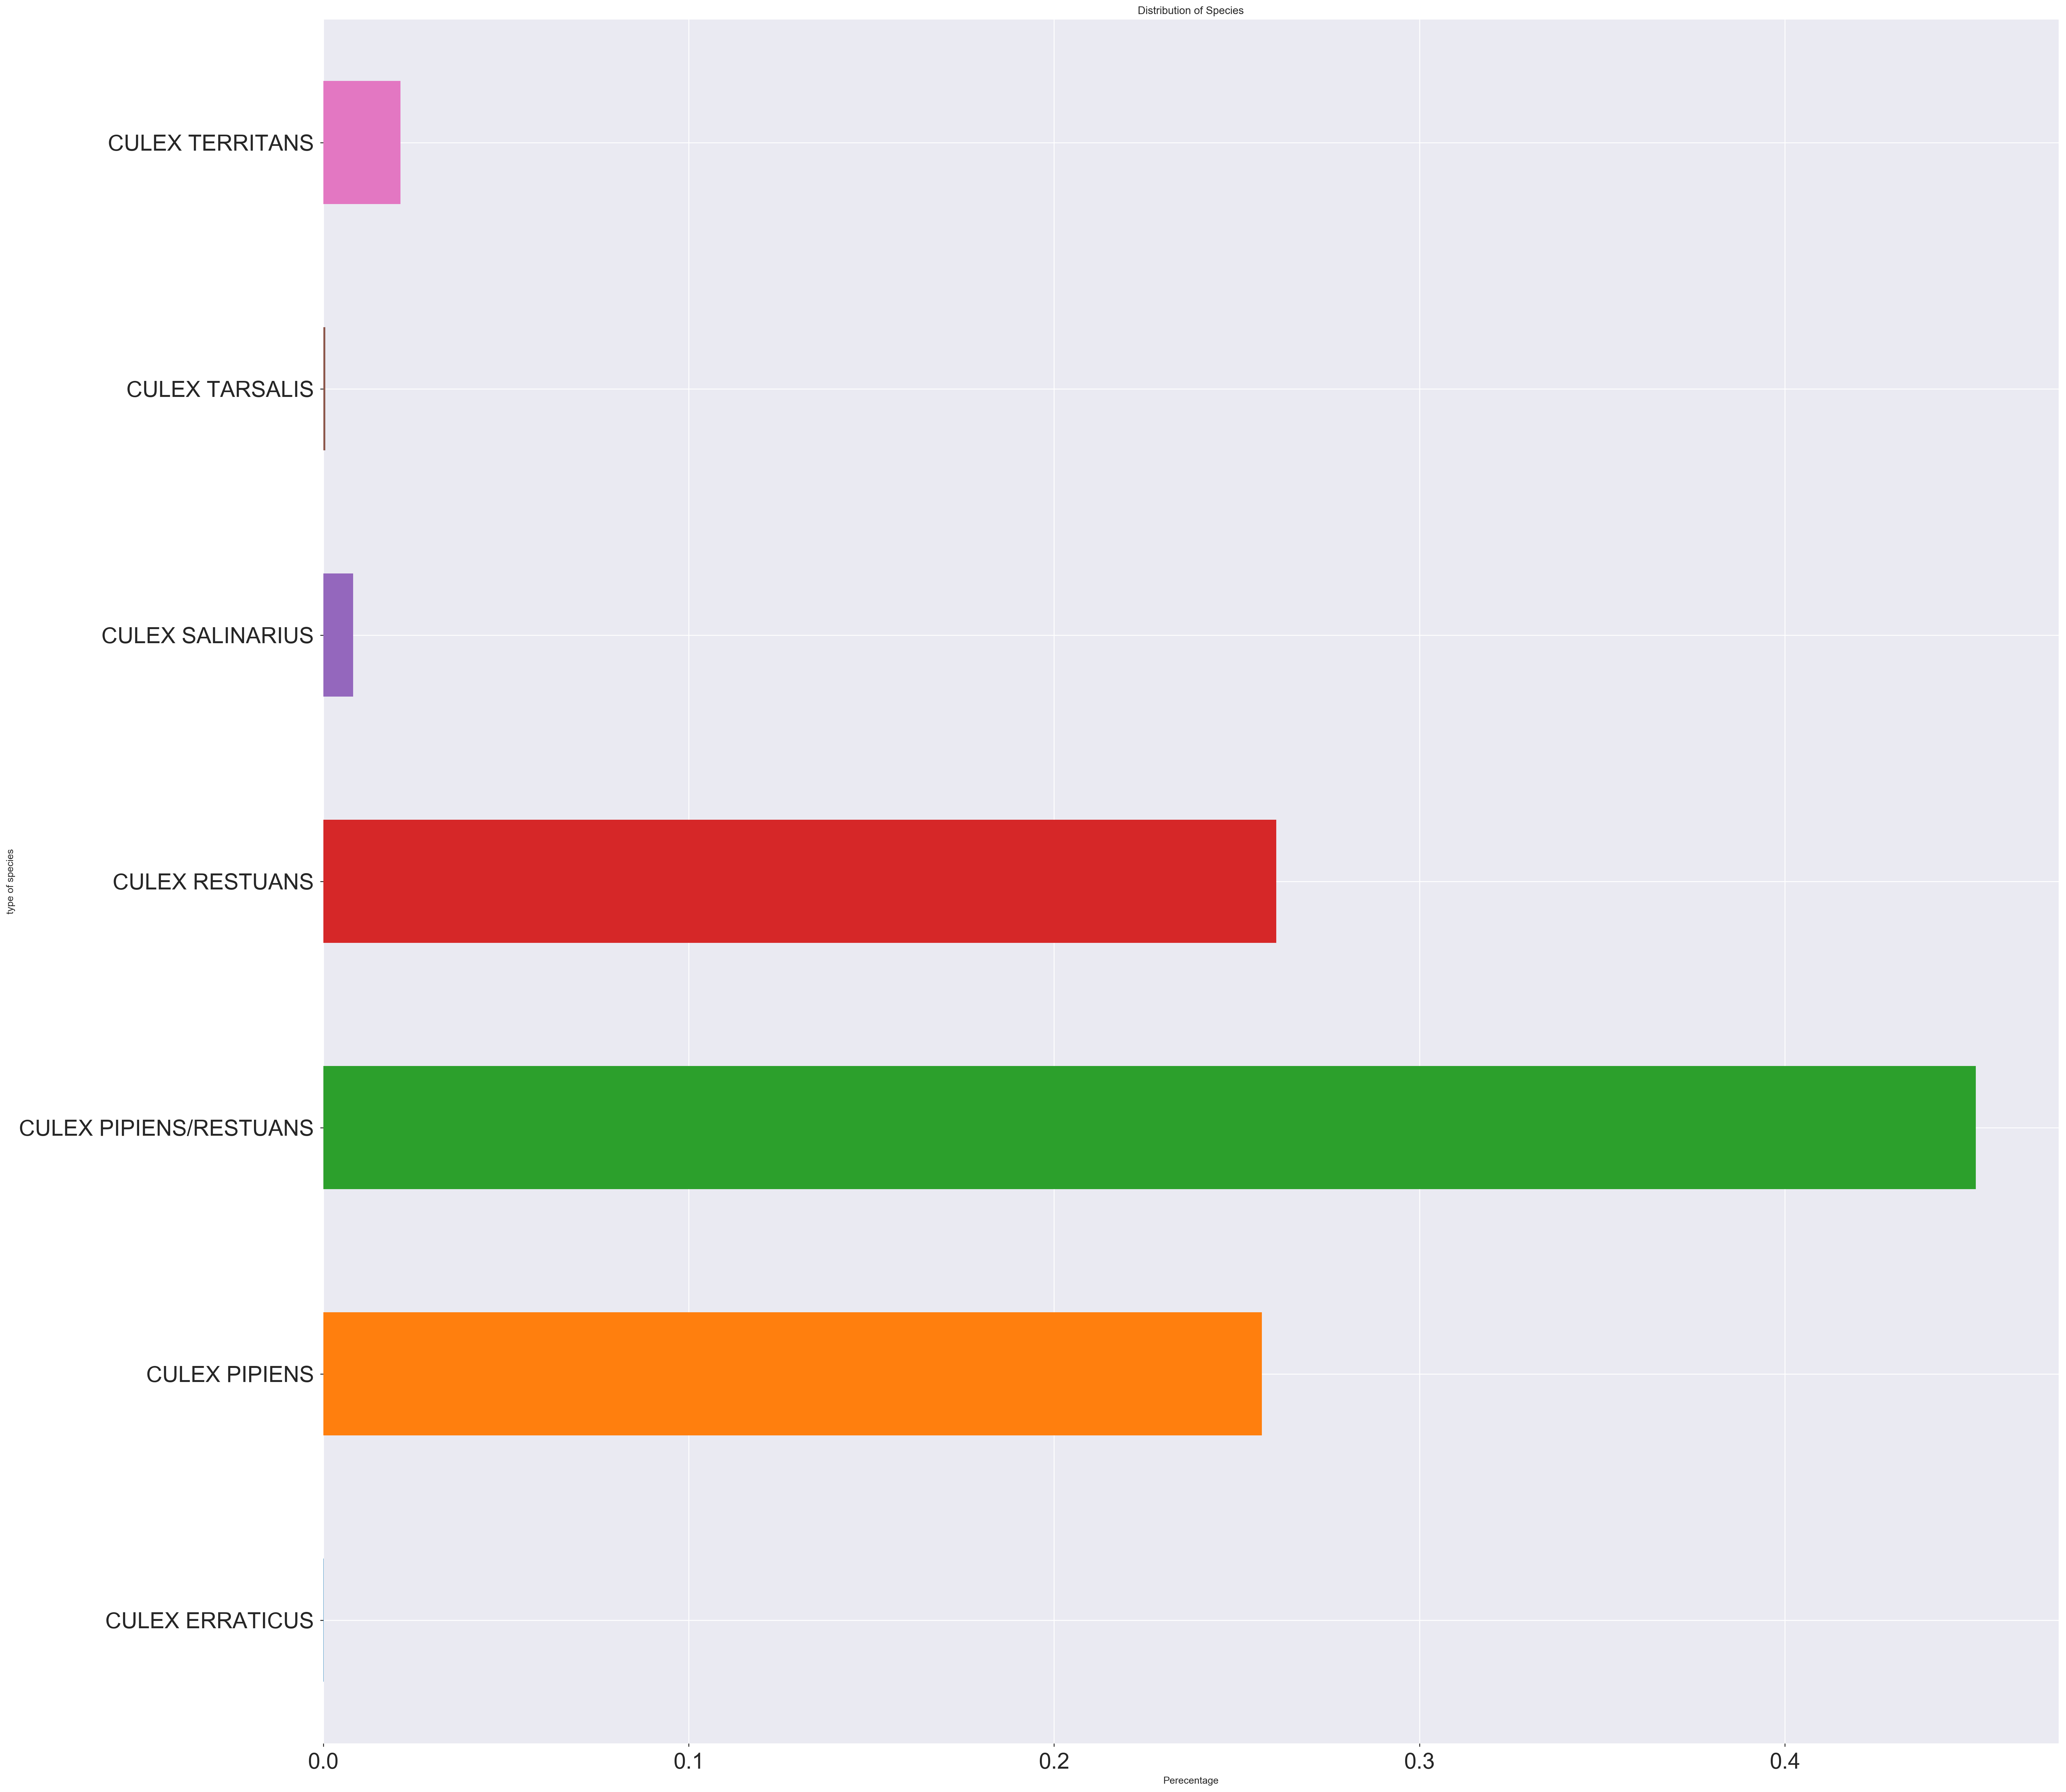

In [53]:
working_data.Species.value_counts(normalize=True).sort_index().plot(kind='barh',figsize=(35,35), fontsize=25)
plt.title('Distribution of Species')
plt.xlabel('Perecentage')
plt.ylabel('type of species')

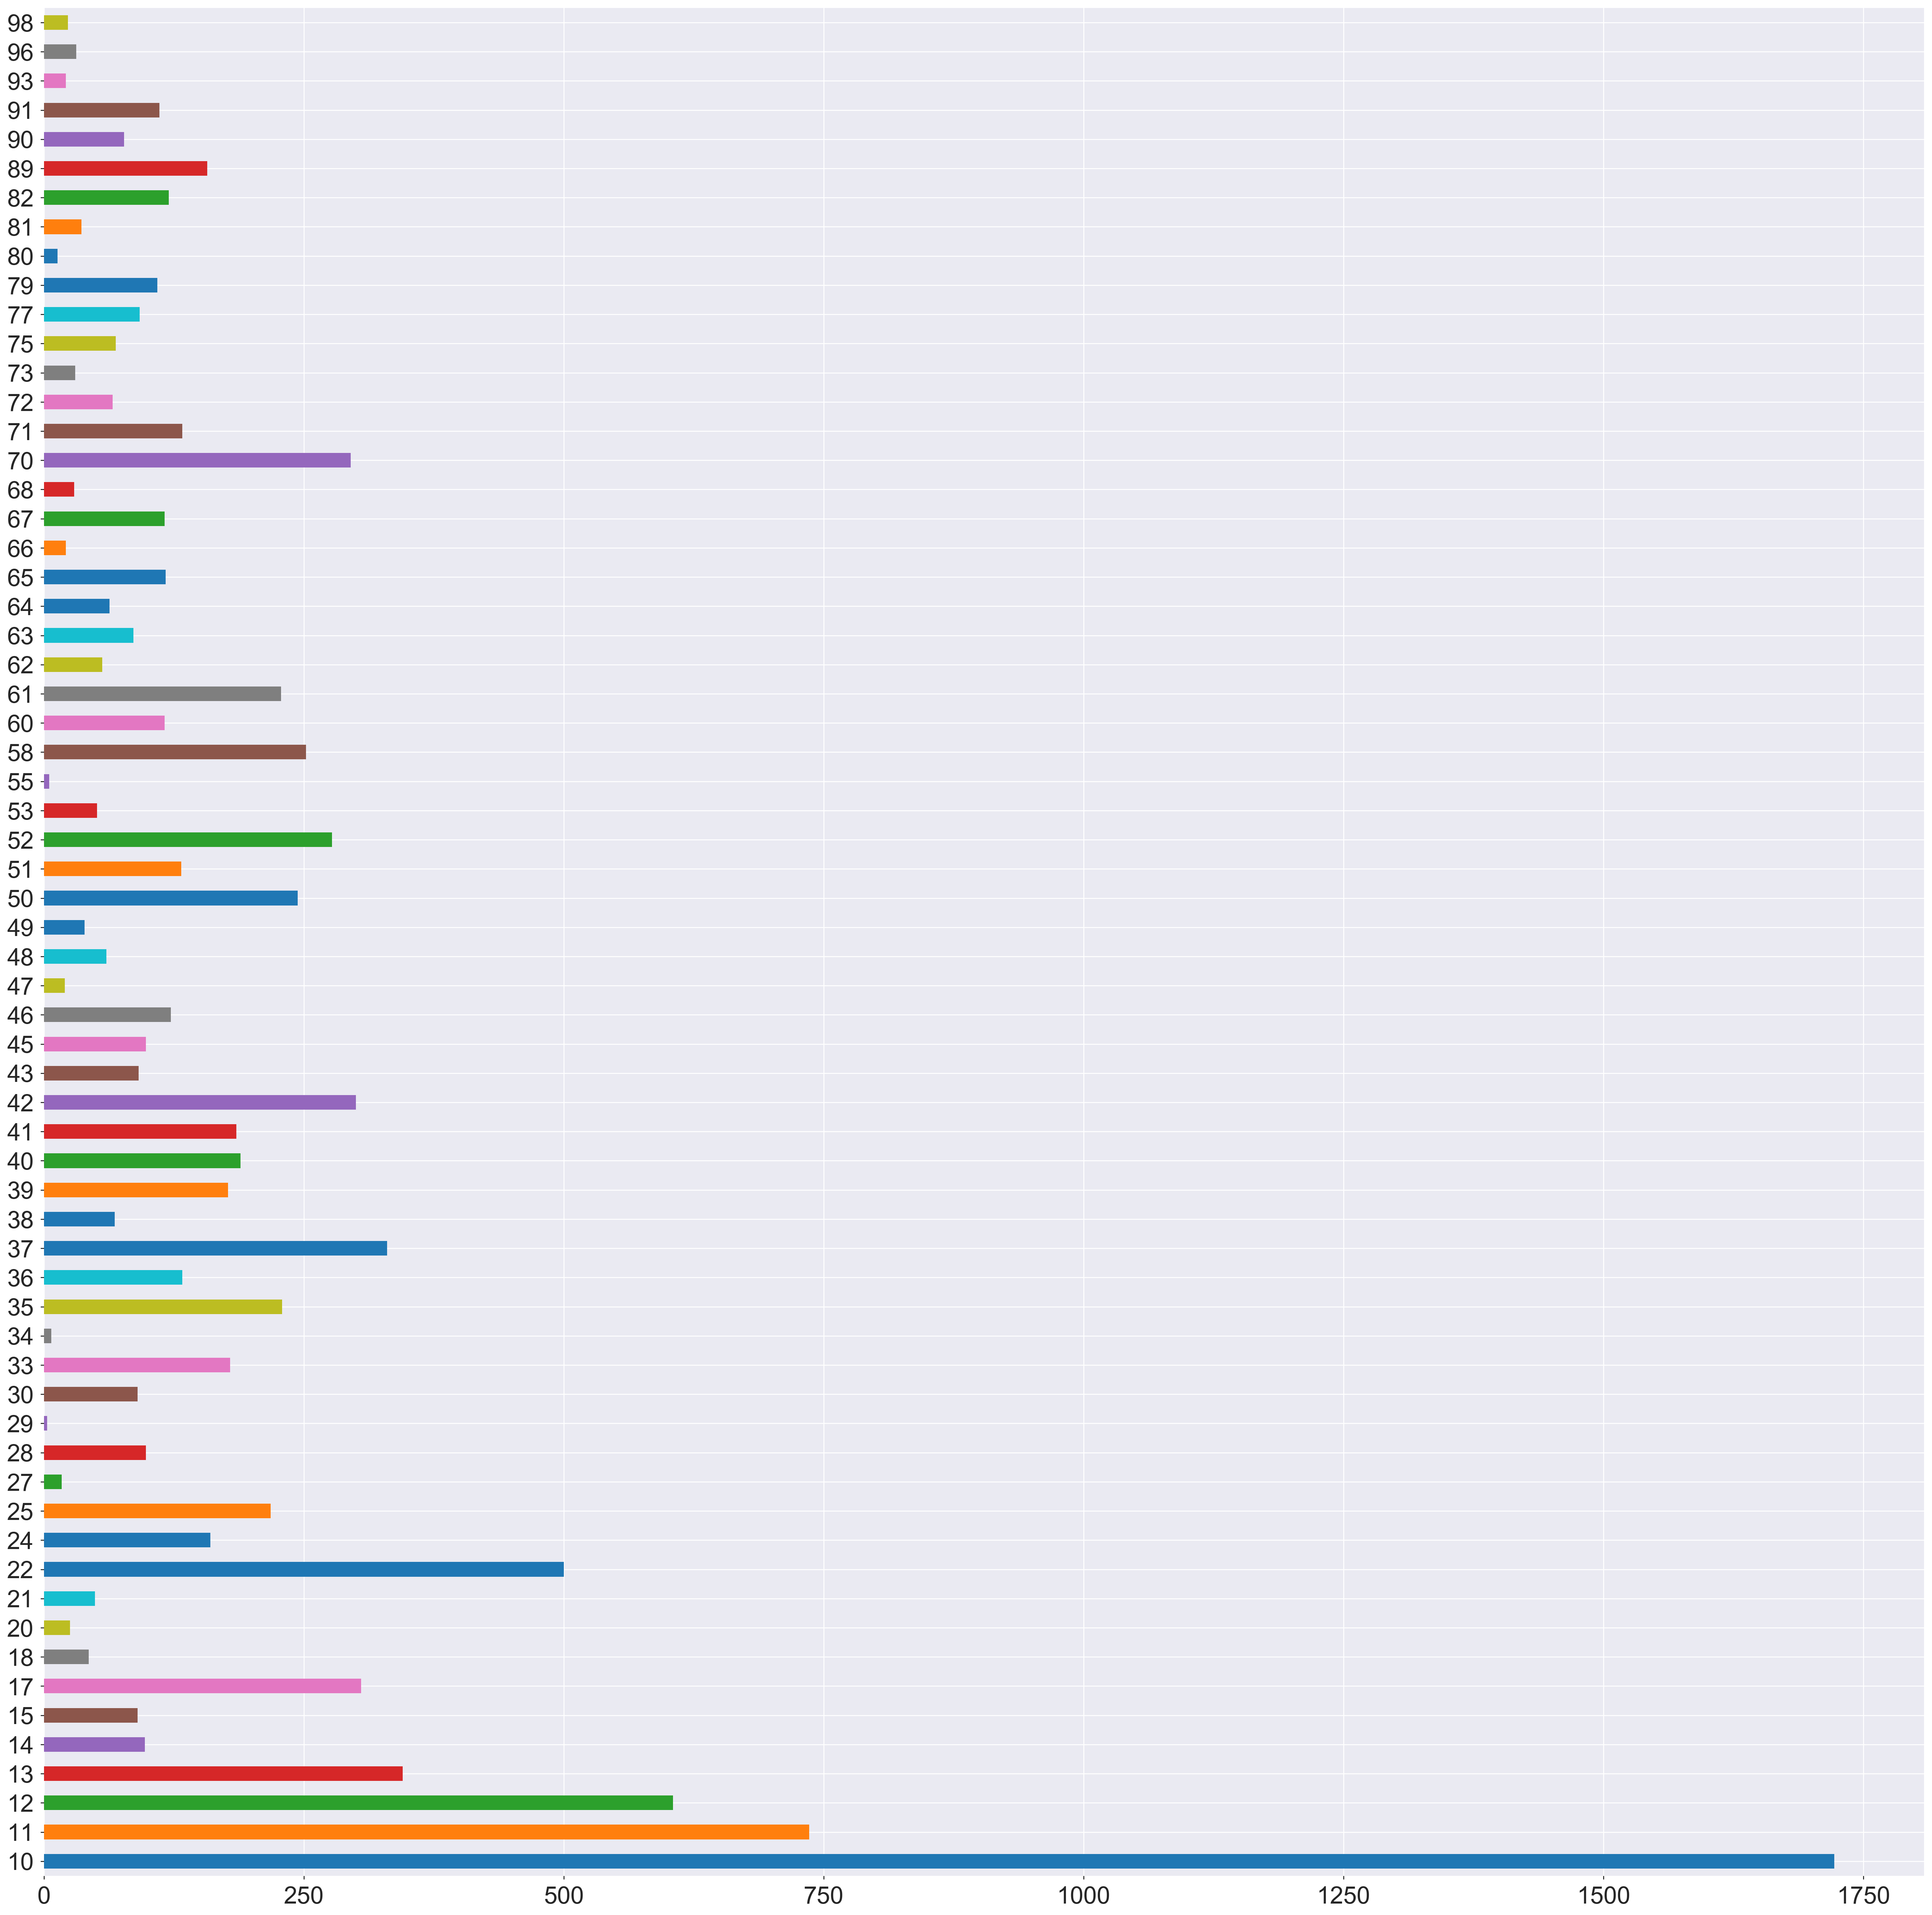

In [54]:
working_data.Block.value_counts().sort_index().plot(kind='barh',figsize=(35,35), fontsize=25)

/Users/kirosgebremariam/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


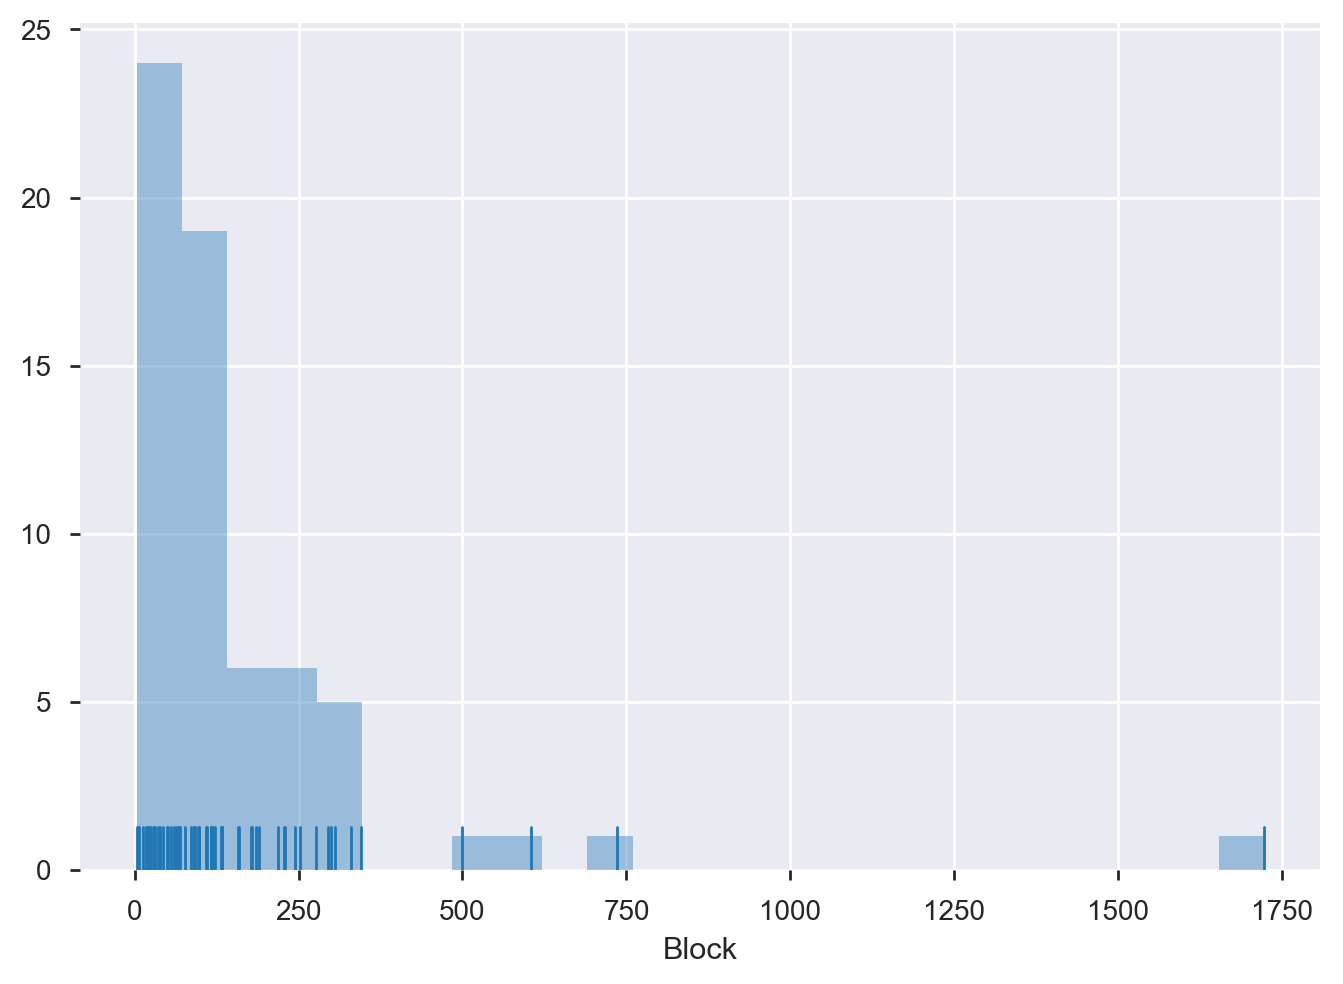

In [55]:
sns.distplot(working_data.Block.value_counts(), kde=False, rug=True)

In [56]:
working_data.groupby('WnvPresent').Species.value_counts()

WnvPresent  Species               
0           CULEX PIPIENS/RESTUANS    4490
            CULEX RESTUANS            2691
            CULEX PIPIENS             2459
            CULEX TERRITANS            222
            CULEX SALINARIUS            86
            CULEX TARSALIS               6
            CULEX ERRATICUS              1
1           CULEX PIPIENS/RESTUANS     262
            CULEX PIPIENS              240
            CULEX RESTUANS              49
Name: Species, dtype: int64

In [57]:
# To get  the missing zipcodes, maybe calculate based on lat/long?
# i tried it but i did not see its relevance

import re
zipcodes = []
for i in working_data['Address']:
    reg = re.compile('\d{5}')
    zipcodes.append(reg.findall(i)) 
#working_data['Zipcode'] = zipcodes

zipcodes2 = []
for i in prediction_data['Address']:
    reg = re.compile('\d{5}')
    zipcodes2.append(reg.findall(i)) 
#prediction_data['Zipcode'] = zipcodes2

##### Merging Data sets
Here we need to merge the weather Data set with Training and testing Data

In [58]:
working_data = working_data.merge(NOAA, how='left',on='Date')

In [59]:
working_data.head(1)

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   ...   SnowFall  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0  ...        0.0          0.0        29.39     30.11          5.8         18   

   AvgSpeed  DewPointcl  Trange  SatT  
0       6.5           0    28.0  16.0  

[1 rows x 40 columns]

In [60]:
prediction_data = prediction_data.merge(NOAA, how='left', on='Date')
prediction_data.head(1)

Date                                            Address  \
0 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   ...   SnowFall  PrecipTotal  StnPressure  SeaLevel  ResultSpeed  ResultDir  \
0  ...        0.0          0.0        29.28     29.99          8.9         18   

   AvgSpeed  DewPointcl  Trange  SatT  
0      10.0           0    25.0  18.0  

[1 rows x 38 columns]

In [61]:
prediction_data['Hour'] = prediction_data.Date.dt.hour
prediction_data['Month'] = prediction_data.Date.dt.month
prediction_data['Year'] = prediction_data.Date.dt.year
prediction_data['Day'] = prediction_data.Date.dt.day
prediction_data['Week'] = prediction_data.Date.dt.week

In [62]:
working_data['Hour'] = working_data.Date.dt.hour
working_data['Month'] = working_data.Date.dt.month
working_data['Year'] = working_data.Date.dt.year
working_data['Day'] = working_data.Date.dt.day
working_data['Week'] = working_data.Date.dt.week

In [63]:
#concatenating dummy variables of Species, Trap, and Block 
# with our combined  working_data(training) set
wd_dummies= pd.concat([working_data, pd.get_dummies(working_data[['Species', 'Trap', 'Block']])], axis = 1)
wd_dummies.head(1) 

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

     ...      Trap_T230  Trap_T231  Trap_T232  Trap_T233  Trap_T235  \
0    ...              0          0          0          0          0   

   Trap_T236  Trap_T237  Trap_T238  Trap_T900  Trap_T903  
0          0          0          0          0          0  

[1 rows x 184 columns]

In [64]:
#dropping the columns we created dummy variables 
wd_dummies = wd_dummies.drop(['Block', 'Species', 'Trap'], axis=1)
wd_dummies.head(1) 

Date                                            Address  \
0 2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

            Street             AddressNumberAndStreet  Latitude  Longitude  \
0   N OAK PARK AVE  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991   

   AddressAccuracy  NumMosquitos  WnvPresent  Hour    ...      Trap_T230  \
0                9             1           0     0    ...              0   

   Trap_T231  Trap_T232  Trap_T233  Trap_T235  Trap_T236  Trap_T237  \
0          0          0          0          0          0          0   

   Trap_T238  Trap_T900  Trap_T903  
0          0          0          0  

[1 rows x 180 columns]

In [65]:
# concatenating and creating Dummies the testing data 
pd_dummies  = pd.concat([prediction_data, pd.get_dummies(prediction_data[['Species', 'Trap', 'Block']])], axis = 1)
pd_dummies.head(1) 

Date                                            Address  \
0 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

     ...      Trap_T231  Trap_T232  Trap_T233  Trap_T234  Trap_T235  \
0    ...              0          0          0          0          0   

   Trap_T236  Trap_T237  Trap_T238  Trap_T900  Trap_T903  
0          0          0          0          0          0  

[1 rows x 195 columns]

In [66]:
pd_dummies= pd_dummies.drop(['Block', 'Species', 'Trap'], axis=1)
pd_dummies.head(2)

Date                                            Address  \
0 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1 2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

            Street             AddressNumberAndStreet  Latitude  Longitude  \
0   N OAK PARK AVE  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991   
1   N OAK PARK AVE  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991   

   AddressAccuracy  Hour  Month  Year    ...      Trap_T231  Trap_T232  \
0                9     0      6  2008    ...              0          0   
1                9     0      6  2008    ...              0          0   

   Trap_T233  Trap_T234  Trap_T235  Trap_T236  Trap_T237  Trap_T238  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   

   Trap_T900  Trap_T903  
0          0          0  
1          0          0  

[2 rows x 191 columns]

In [67]:
##The baseline of the DF: 
(1 - working_data['WnvPresent'].mean())*100 

94.75537787930706

In [68]:
working_data.columns # checking the column names

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Hour', 'Week', 'Month', 'Year', 'Day',
       'Station', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'SnowFall',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'DewPointcl', 'Trange', 'SatT'],
      dtype='object')

In [69]:
prediction_data.columns  # checking the prediction data column names

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'Hour', 'Month', 'Year', 'Day', 'Week', 'Station', 'Tmax', 'Tmin',
       'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise',
       'Sunset', 'CodeSum', 'Depth', 'SnowFall', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'DewPointcl',
       'Trange', 'SatT'],
      dtype='object')

In [70]:
wd_dummies.columns  # checking the list of column names of working Data dummies

Index(['Date', 'Address', 'Street', 'AddressNumberAndStreet', 'Latitude',
       'Longitude', 'AddressAccuracy', 'NumMosquitos', 'WnvPresent', 'Hour',
       ...
       'Trap_T230', 'Trap_T231', 'Trap_T232', 'Trap_T233', 'Trap_T235',
       'Trap_T236', 'Trap_T237', 'Trap_T238', 'Trap_T900', 'Trap_T903'],
      dtype='object', length=180)

In [71]:
pd_dummies.columns  # checking the list of column names of prediction Data dummies

Index(['Date', 'Address', 'Street', 'AddressNumberAndStreet', 'Latitude',
       'Longitude', 'AddressAccuracy', 'Hour', 'Month', 'Year',
       ...
       'Trap_T231', 'Trap_T232', 'Trap_T233', 'Trap_T234', 'Trap_T235',
       'Trap_T236', 'Trap_T237', 'Trap_T238', 'Trap_T900', 'Trap_T903'],
      dtype='object', length=191)

###### DATA VISUALIZATION AND EXPLORATION

In [72]:
wd_dummies.corr()    # correlation will give me some hints where to focus on  in the next analysis phase

Latitude  Longitude  AddressAccuracy  NumMosquitos  \
Latitude         1.000000  -0.701795         0.444026     -0.184806   
Longitude       -0.701795   1.000000        -0.456775      0.036633   
AddressAccuracy  0.444026  -0.456775         1.000000     -0.248414   
NumMosquitos    -0.184806   0.036633        -0.248414      1.000000   
WnvPresent       0.028697  -0.060345         0.008064      0.196820   
Hour                  NaN        NaN              NaN           NaN   
Week            -0.077001   0.085025        -0.075466     -0.020444   
Month           -0.085219   0.097004        -0.074983     -0.026040   
Year             0.163832  -0.188830         0.162514     -0.029611   
Day              0.038678  -0.049094         0.008224      0.020451   
Station               NaN        NaN              NaN           NaN   
Tmax            -0.068892   0.084255        -0.078346      0.163188   
Tmin            -0.095609   0.100828        -0.106834      0.192904   
Tavg            -0.087314   0.099078        -0.096738      0.189484   
Depart          -0.084894   0.105610        -0.098285      0.104274   
DewPoint        -0.062183   0.085279        -0.080370      0.160362   
WetBulb         -0.074640   0.091717        -0.088577      0.178896   
Heat             0.044287  -0.055830         0.040427     -0.135574   
Cool            -0.093508   0.103292        -0.107966      0.182996   
Depth                 NaN        NaN              NaN           NaN   
SnowFall         0.035097  -0.027922         0.029506     -0.024226   
PrecipTotal      0.039770  -0.003956         0.036984     -0.053068   
StnPressure     -0.018856   0.018374        -0.011051     -0.033639   
SeaLevel        -0.010191   0.008716        -0.003315     -0.045119   
ResultSpeed      0.021556  -0.016909        -0.000356      0.001570   
ResultDir        0.006661  -0.004079         0.013979     -0.026992   
AvgSpeed        -0.004583   0.013441        -0.023083      0.021663   
DewPointcl      -0.040211   0.059687        -0.058882      0.108252   
Trange           0.028797  -0.013471         0.030189     -0.022872   
SatT            -0.043593   0.020556        -0.025759      0.044679   
...                   ...        ...              ...           ...   
Trap_T160        0.051293   0.011275         0.011611     -0.032069   
Trap_T161       -0.053937   0.012810         0.040471     -0.024722   
Trap_T162       -0.045899   0.039718         0.005559     -0.026409   
Trap_T200       -0.160733   0.162433        -0.216379     -0.015542   
Trap_T206       -0.041320   0.072730        -0.086852     -0.027070   
Trap_T209       -0.099782   0.177823        -0.217226     -0.029778   
Trap_T212       -0.172167   0.206784         0.015050      0.031684   
Trap_T215       -0.090025   0.114357         0.008147      0.024717   
Trap_T218        0.079959  -0.026870         0.010462     -0.039236   
Trap_T219        0.049958   0.011700         0.005559     -0.029051   
Trap_T220        0.105729   0.008142         0.078843     -0.038583   
Trap_T221       -0.167607   0.173401         0.012894      0.014903   
Trap_T222        0.056509  -0.036495         0.009414     -0.036893   
Trap_T223        0.107565  -0.099561         0.074247      0.010595   
Trap_T224        0.067639   0.021190         0.058402     -0.033835   
Trap_T225       -0.086265  -0.032505         0.012360      0.041323   
Trap_T226       -0.036068   0.040665        -0.166755     -0.009803   
Trap_T227       -0.086416   0.088669        -0.167843      0.012125   
Trap_T228        0.075675  -0.020078         0.009571     -0.011856   
Trap_T229       -0.021482   0.017188        -0.053573     -0.016005   
Trap_T230        0.044131  -0.045985         0.064109     -0.014407   
Trap_T231        0.082127   0.022216         0.007870     -0.001762   
Trap_T232        0.043811   0.022823         0.056187     -0.030577   
Trap_T233        0.103502  -0.076933         0.056187      0.009886   
Trap_T235       -0.044226   0.058129     

In [73]:
pd_dummies.corr()

Latitude  Longitude  AddressAccuracy  Hour  \
Latitude                 1.000000  -0.648909         0.321558   NaN   
Longitude               -0.648909   1.000000        -0.399896   NaN   
AddressAccuracy          0.321558  -0.399896         1.000000   NaN   
Hour                          NaN        NaN              NaN   NaN   
Month                    0.000238  -0.000411         0.000027   NaN   
Year                     0.003224  -0.004795         0.001658   NaN   
Day                     -0.000219  -0.000066         0.000170   NaN   
Week                     0.000249  -0.000456         0.000073   NaN   
Station                       NaN        NaN              NaN   NaN   
Tmax                     0.001979  -0.002453         0.000679   NaN   
Tmin                     0.002142  -0.002934         0.000979   NaN   
Tavg                     0.002235  -0.002958         0.000884   NaN   
Depart                   0.000739  -0.000727         0.000193   NaN   
DewPoint                 0.001518  -0.001987         0.000815   NaN   
WetBulb                  0.001794  -0.002320         0.000854   NaN   
Heat                     0.000126   0.000090         0.000163   NaN   
Cool                     0.002718  -0.003508         0.001115   NaN   
Depth                         NaN        NaN              NaN   NaN   
SnowFall                -0.000534   0.001308        -0.000448   NaN   
PrecipTotal             -0.000036   0.001447         0.000041   NaN   
StnPressure              0.001393  -0.001235         0.000562   NaN   
SeaLevel                 0.000930  -0.000526         0.000276   NaN   
ResultSpeed             -0.002468   0.003194        -0.000780   NaN   
ResultDir               -0.000553  -0.000408        -0.000096   NaN   
AvgSpeed                -0.001550   0.003311        -0.000831   NaN   
DewPointcl               0.000885  -0.001419         0.000752   NaN   
Trange                   0.000295  -0.000049        -0.000178   NaN   
SatT                     0.000769  -0.001052        -0.000034   NaN   
Species_CULEX ERRATICUS -0.003828   0.006832        -0.002197   NaN   
Species_CULEX PIPIENS    0.000740  -0.002649         0.000515   NaN   
...                           ...        ...              ...   ...   
Trap_T206               -0.085477   0.151352        -0.191276   NaN   
Trap_T209               -0.082911   0.148107        -0.191655   NaN   
Trap_T212               -0.129267   0.160626         0.002980   NaN   
Trap_T215               -0.124020   0.162841         0.002955   NaN   
Trap_T218                0.075508  -0.037399         0.002969   NaN   
Trap_T218A               0.080185  -0.037420         0.002955   NaN   
Trap_T218B               0.075346  -0.047986         0.067788   NaN   
Trap_T218C               0.064201  -0.045043         0.067788   NaN   
Trap_T219                0.089481   0.019077         0.002955   NaN   
Trap_T220                0.088109   0.001877         0.068412   NaN   
Trap_T221               -0.145642   0.156673         0.002973   NaN   
Trap_T222                0.057760  -0.053059         0.002959   NaN   
Trap_T223                0.095573  -0.112997         0.068324   NaN   
Trap_T224                0.074495   0.022328         0.067744   NaN   
Trap_T225               -0.080965  -0.038118         0.002967   NaN   
Trap_T226               -0.042284   0.039623        -0.191276   NaN   
Trap_T227               -0.092110   0.093286        -0.191529   NaN   
Trap_T228                0.078182  -0.031641         0.002963   NaN   
Trap_T229               -0.073030   0.054113        -0.191276   NaN   
Trap_T230                0.041757  -0.062896         0.067788   NaN   
Trap_T231                0.106371   0.028115         0.002996   NaN   
Trap_T232                0.048070   0.025732         0.067699   NaN   
Trap_T233                0.122519  -0.114570         0.067923   NaN   
Trap_T234                0.070685  -0.068412         0.002955   NaN   
Trap_T235               -0.055553   0.066943     

In [74]:
working_data.to_csv('working_data1.csv')
prediction_data.to_csv('prediction_data1.csv')
NOAA.to_csv('NOAA1.csv')
spray.to_csv('spray1.csv')

### My Analysis from EDA takeaways
There are values labeled as M (missing) and T (trace), we had to label the M values as missing as the M actually meant it was a missing value and T with a trace amount for the data series (the value depended on the data series itself). Some values had white space that  had to be removed.
Feature engineeringed new features such as the differences between the minimum and maximum averages, a binary variable of 0 and 1 for dew point if it was greater than 65 degrees (value of 1) and 0 for less than 55 degrees as a low dew point indicates a drier environment, and the difference between the dew point and the average temperature to determine humidity.
Variables showing higher detections of west nile virus detection: zero precipitation total, higher dew point temperatures, higher wet bulb temperatures, higher temperatures, more mosquitos, higher humidity.
Visualizations show that the virus was detected in the mosquito species of Culex Restuans, Culex Pipiens and Culex Restuans/Pipiens. Also, August had the highest detection frequency among the mosquitos.

##### Additional works after  for the purpose of visualization only, i did not use them as i have accomplished everey thing i need above

(array([  91.,    0.,    0., 1807.,    0.,    0.,    0.,    0., 4628.,
        3980.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

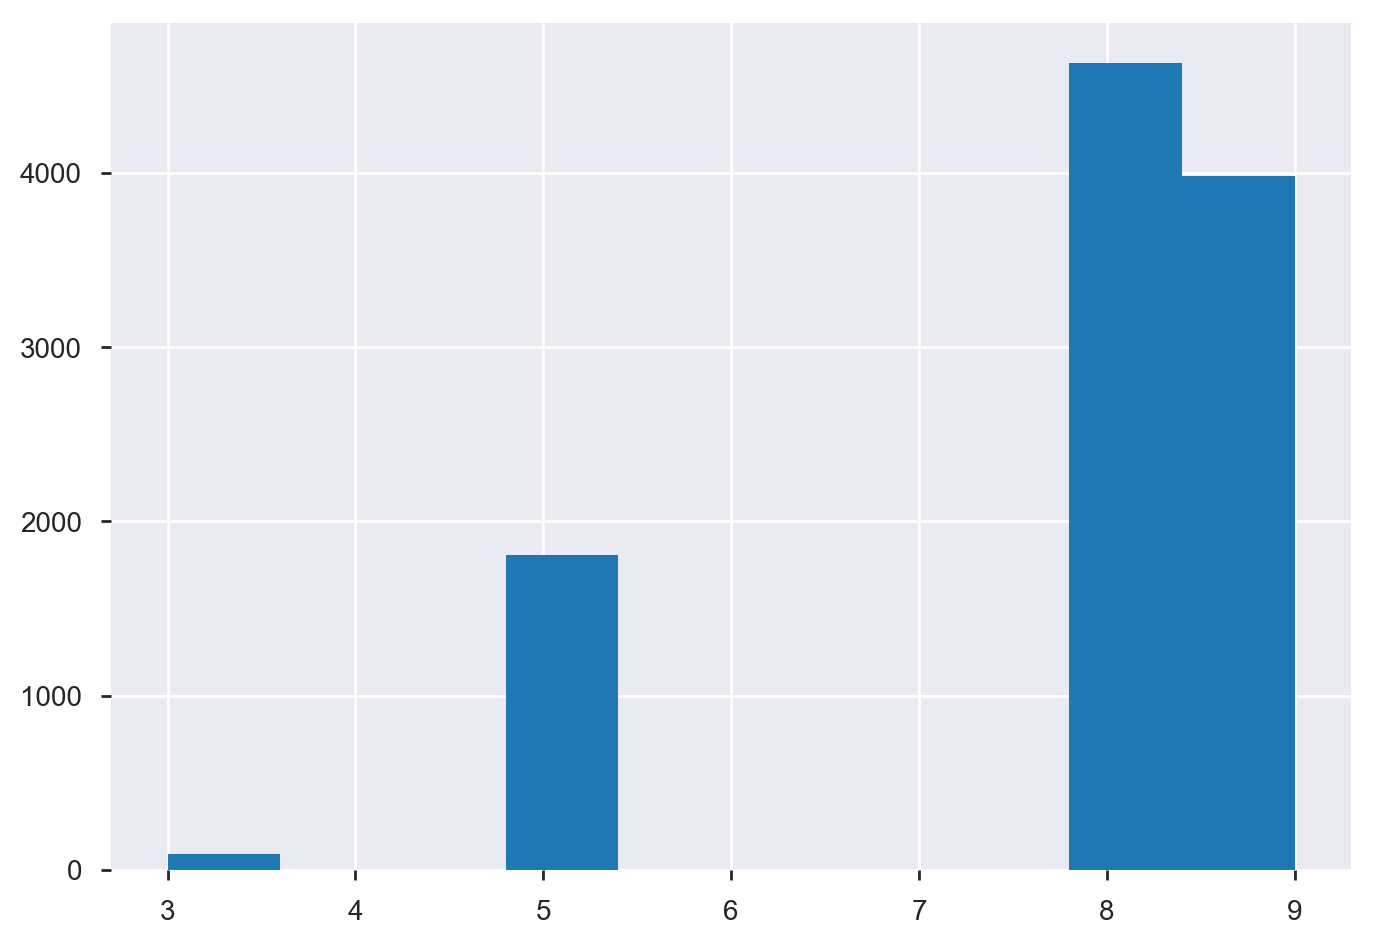

In [75]:
# Plotting AddressAccuracy to understand shape

plt.hist(working_data['AddressAccuracy'])

In [76]:
# Basic working_data EDA

working_data.describe();

In [77]:
# Basic Prediction_data EDA

prediction_data.describe();

(array([1135.,  690., 1450.,  823.,  991.,  684.,  666., 1048., 2017.,
        1002.]),
 array([41.644612 , 41.6818938, 41.7191756, 41.7564574, 41.7937392,
        41.831021 , 41.8683028, 41.9055846, 41.9428664, 41.9801482,
        42.01743  ]),
 <a list of 10 Patch objects>)

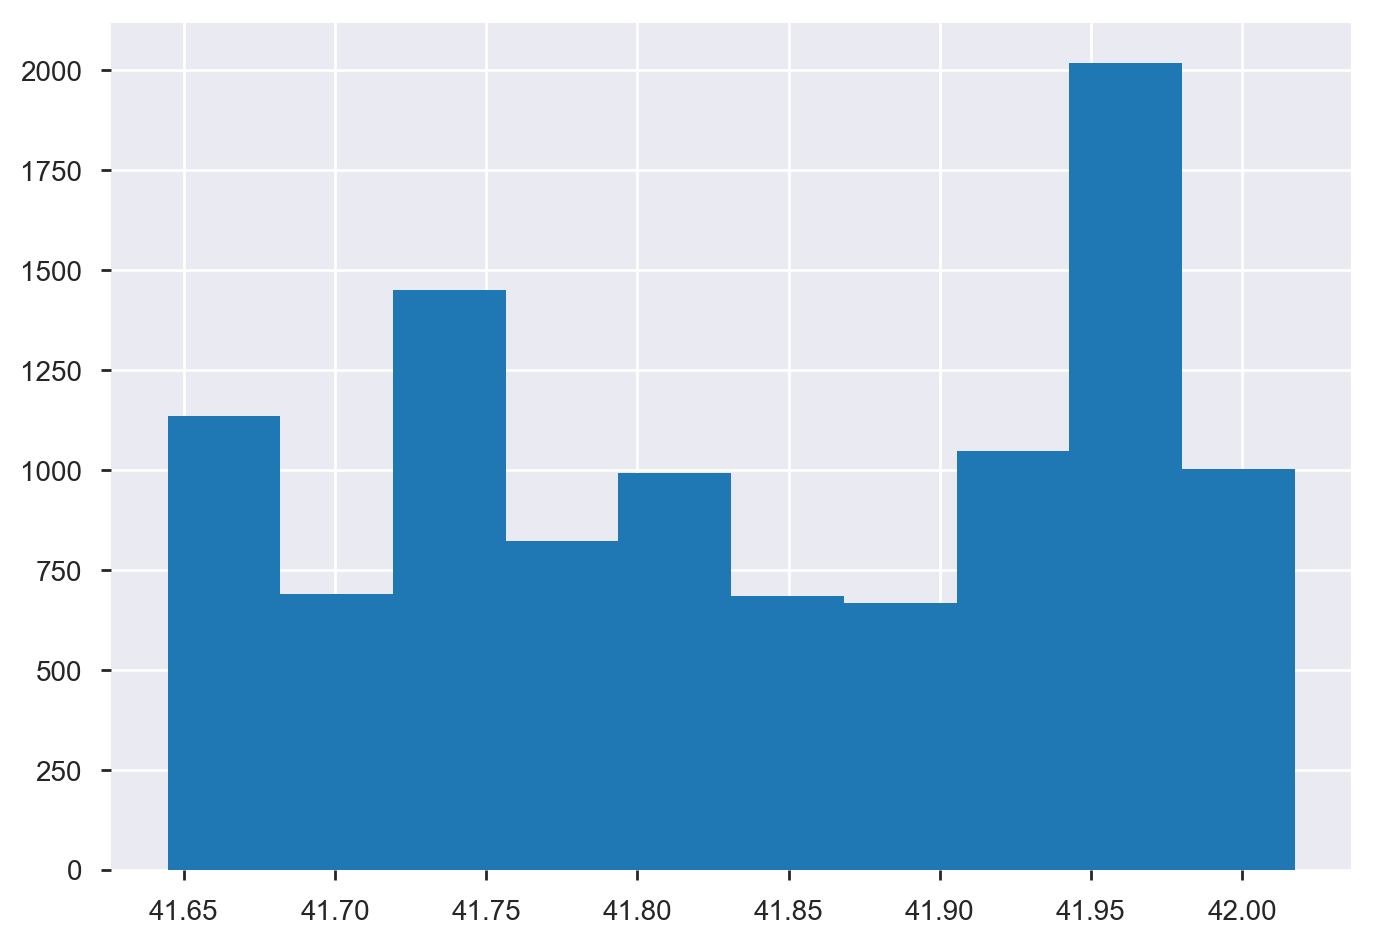

In [78]:
# Quick plot to view Train Latitudes

plt.hist(working_data.Latitude)

(array([ 140.,  830.,  265., 1144., 1148., 1883., 1832.,  915., 1365.,
         984.]),
 array([-87.930995, -87.891059, -87.851123, -87.811187, -87.771251,
        -87.731315, -87.691379, -87.651443, -87.611507, -87.571571,
        -87.531635]),
 <a list of 10 Patch objects>)

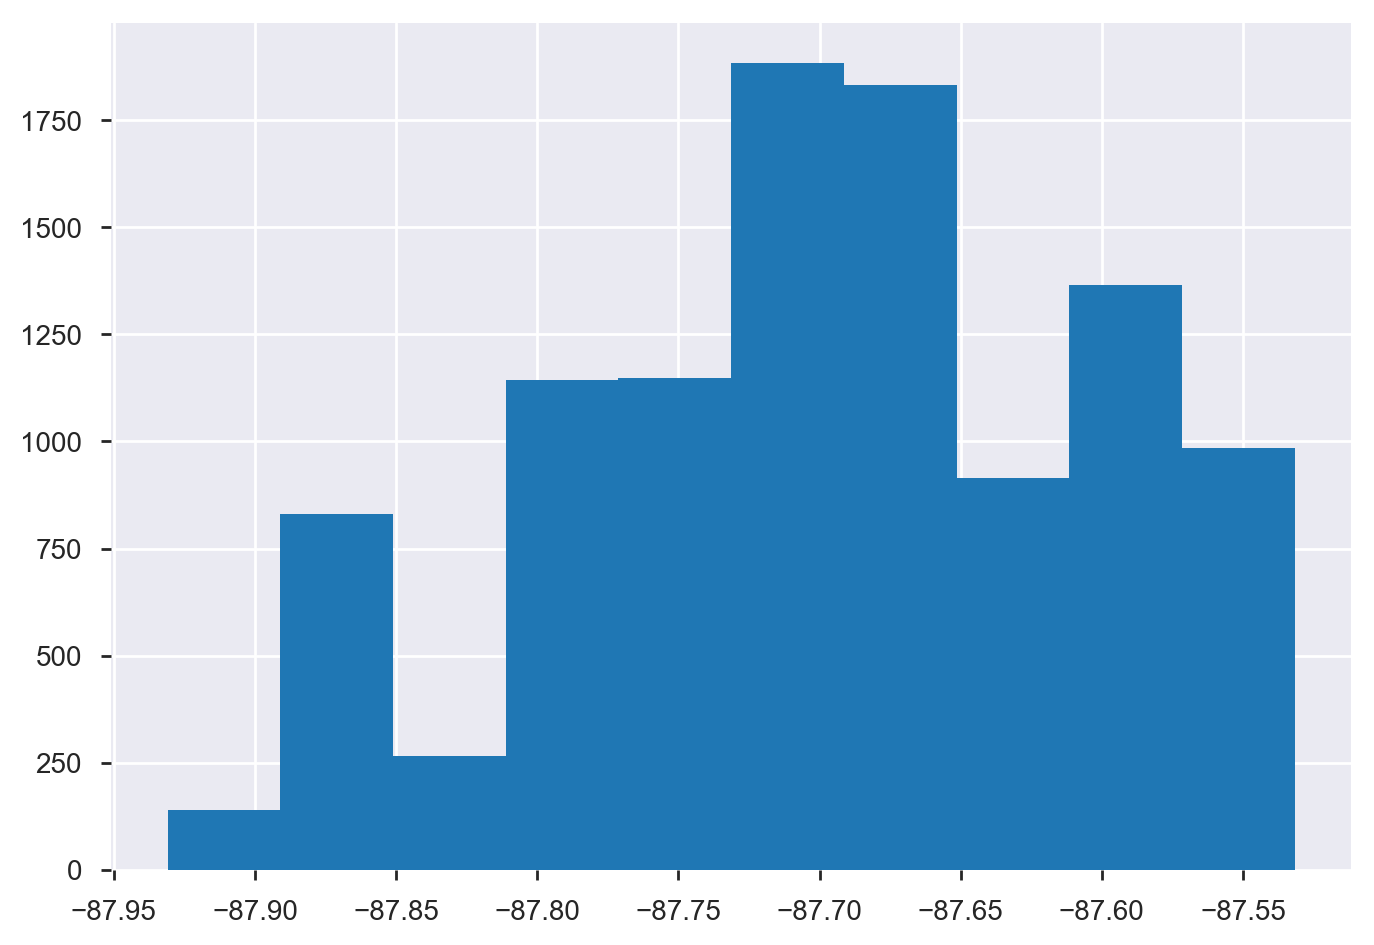

In [79]:
# Quick plot to view Train Longitudes

plt.hist(working_data.Longitude)